In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from importlib import reload
plt=reload(plt)
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/income.csv')
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])
df.head(10)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


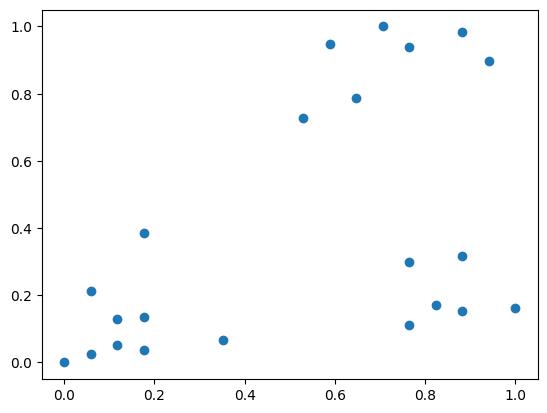

In [ ]:
plt.scatter(df['Age'], df['Income($)'])

In [ ]:
k_range = range(1, 11)
sse = []
for k in k_range:
    kmc = KMeans(n_clusters=k)
    kmc.fit(df[['Age', 'Income($)']])
    sse.append(kmc.inertia_)
sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.2798062931046179,
 0.21055478995472496,
 0.1685851223602976,
 0.13781880133764024,
 0.10824862283029266,
 0.08139933135681812]

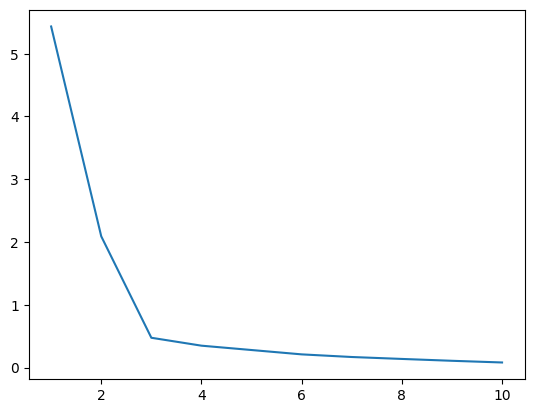

In [ ]:
plt.xlabel = 'Number of Clusters'
plt.ylabel = 'Sum of Squared Errors'
plt.plot(k_range, sse)

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [ ]:
df0 = df[df.cluster == 0]
df0

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0
12,Arnold,0.058824,0.025641,0
13,Jared,0.117647,0.051282,0
14,Stark,0.176471,0.038462,0
15,Ranbir,0.352941,0.068376,0


In [ ]:
df1 = df[df.cluster == 1]
df1

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,1
17,Priyanka,0.882353,0.153846,1
18,Nick,1.000000,0.162393,1
19,Alia,0.764706,0.299145,1
20,Sid,0.882353,0.316239,1
21,Abdul,0.764706,0.111111,1


In [ ]:
df2 = df[df.cluster == 2]
df2

,Name,Age,Income($),cluster
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2
10,Donald,0.647059,0.786325,2


In [ ]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

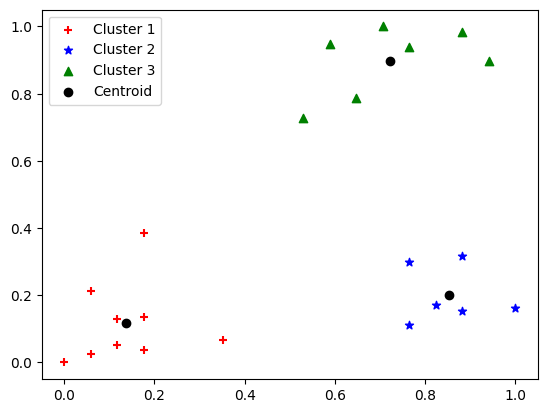

In [ ]:
p1 = plt.scatter(df0['Age'], df0['Income($)'], marker='+', color='red')
p2 = plt.scatter(df1['Age'], df1['Income($)'], marker='*', color='blue')
p3 = plt.scatter(df2['Age'], df2['Income($)'], marker='^', color='green')
c = plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.legend((p1, p2, p3, c),
          ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroid'))
